## Obtención de la función aceptancia numéricamente a partir del cálculo de la aceptancia geométrica partiendo de la definición del ángulo sólido.

**Resumen:** con el siguiente código calculamos la resolución angular y la aceptancia para el Telescopio de Muones MuTe-UIS. Además, con esta aceptancia calculada y con algunos datos de los flujos puede ser usada la fórmula de Lesparre para el cálculo de tiempos estimados de exposición para la toma de datos experimentales in situ..

In [1]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import rc
import scipy as sc
%matplotlib inline
import numpy as np
import random
np.seterr(divide='ignore', invalid='ignore')
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
from scipy.misc import imread                   # Cargo imread de scipy.misc
import math
from matplotlib import cm
import csv, operator
import scipy.stats as st
from numpy import random
import pandas as pd
from matplotlib.mlab import griddata
from numpy import *

Definiendo parámetros del MuTe: H = distancia entre las placas, h = tamaño del pixel, Np = número de pixeles.. L = 0 siempre...

In [2]:
H=200.
h=4.
Np=30.
L=0
Nd=Np**2
alphamin=np.arccos((h*Np)/(np.sqrt(2*(h*Np)**2+H**2)))
print H

200.0


Definiendo la función aceptancia a partir de la resolución angular y del ángulo sólido diferencial. Los ángulos $\alpha$ y $\beta$ son los cosenos directores para la trayectoria del muón en el detector.

In [3]:
def OmegaCal(alpha, beta, H=200, h=4, Np=30, L=0):
    Nd=Np**2
    alphamin=np.arccos((h*Np)/(np.sqrt(2*(h*Np)**2+H**2)))
    r = np.sqrt(1.-(np.cos(alpha)**2)-(np.cos(beta)**2))
    m = H*np.abs(np.cos(alpha))/(h*r)
    n = H*np.abs(np.cos(beta))/(h*r)
    S=np.abs(h**2*(Np-m)*(Np-n))
    N1=h**2*(H-L)
    D11=((H-L)**2+h**2*(m**2+n**2-n))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))
    D12=0.5*(2*(H-L)**2+h**2*(2*m**2+2*n**2-1))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n-0.5)*h)**2))
    D13=((H-L)**2+h**2*(m**2+n**2-m))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))
    D14=(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n-0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))
    N2=h**2*(H-L)
    D21=((H-L)**2+h**2*(m**2+n**2+n))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))
    D22=((H-L)**2+h**2*(m**2+n**2+m))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))
    D23=0.5*(2*(H-L)**2+h**2*(2*m**2+2*n**2-1))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n+0.5)*h)**2))
    D24=(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n-0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m-0.5)*h)**2+np.abs((n+0.5)*h)**2))*(np.sqrt(np.abs(H-L)**2+np.abs((m+0.5)*h)**2+np.abs((n+0.5)*h)**2))
    Omega=8*np.arctan(N1/(D11+D12+D13+D14))+8*np.arctan(N2/(D21+D22+D23+D24))
    Acep = Omega*S/4
    return Omega, Acep

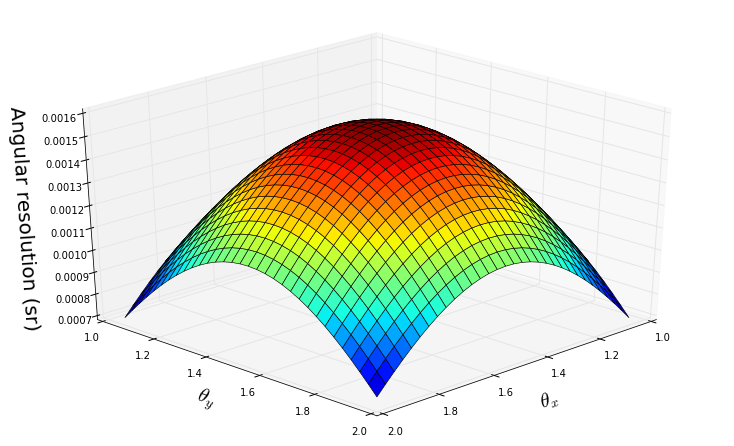

In [4]:
fig = plt.figure(num = None, figsize = (10, 6))
ax = Axes3D(fig)
ax.patch.set_alpha(0)
alpha = np.arange(alphamin, np.pi-alphamin, 0.03)
beta = np.arange(alphamin, np.pi-alphamin, 0.03)
alpha, beta = np.meshgrid(alpha, beta)
Omega, Acep = OmegaCal(alpha, beta)
ax.set_xlim3d(1, 2)
ax.set_ylim3d(1, 2)
#ax.set_zlim3d(0, 0.0011)
#ax.set_xlabel('\n' + 'xlabel', linespacing=4)
ax.set_xlabel('\n' + r'$\theta_x$', linespacing=1, fontsize = 20)
ax.set_ylabel('\n' + r'$\theta_y$', linespacing=1, fontsize = 20)
ax.set_zlabel('\n' + r'Angular resolution (sr)', linespacing=2, fontsize = 20)
ax.view_init(elev=30,azim=45) 
ax.dist=10
ax.plot_surface(alpha, beta, Omega, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.6, antialiased=True)
plt.savefig('angularresolution.png', bbox_inches='tight', transparent=True, dpi = 200)

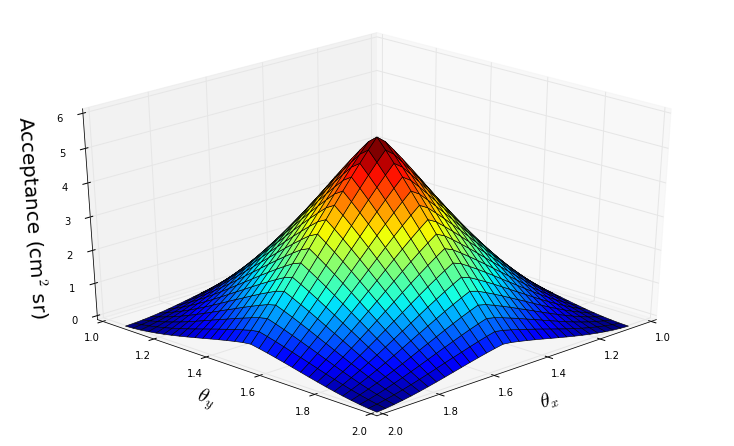

In [5]:
fig = plt.figure(num = None, figsize = (10, 6))
ax = Axes3D(fig)
alpha = np.arange(alphamin, np.pi-alphamin, 0.03)
beta = np.arange(alphamin, np.pi-alphamin, 0.03)
alpha, beta = np.meshgrid(alpha, beta)
Omega, Acep = OmegaCal(alpha, beta)
ax.set_xlim3d(1, 2)
ax.set_ylim3d(1, 2)
#ax.set_zlim3d(0, 0.0011)
ax.set_xlabel('\n' + r'$\theta_x$', linespacing=1, fontsize = 20)
ax.set_ylabel('\n' + r'$\theta_y$', linespacing=1, fontsize = 20)
ax.set_zlabel('\n' + r'Acceptance (cm$^2$ sr)', linespacing=1, fontsize = 20)
ax.view_init(elev=30,azim=45) 
ax.dist=10
ax.plot_surface(alpha, beta, Acep, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.6, antialiased=True)
plt.savefig('acceptance.png', bbox_inches='tight', transparent=True, dpi = 200)

Ahora calculamos los máximos de la resolución angular y de la aceptancia respectivamente...

In [6]:
alpha=np.pi/2
beta=np.pi/2
print alpha
Omega, Acep = OmegaCal(alpha, beta)
print 'Para el caso de nuestro telescopio MuTe, tenemos que:'
print 'Omega(max)=', Omega
print 'Acep(max)=', Acep

1.57079632679
Para el caso de nuestro telescopio MuTe, tenemos que:
Omega(max)= 0.00159984001866
Acep(max)= 5.75942406719


Calculemos la resolución angular y la aceptancia para una dirección determinada..

In [7]:
alpha=np.radians(60.57588014)
beta=np.radians(70.10381248)
print 'alpha=', alpha
print 'beta=', beta

alpha= 1.05724855574
beta= 1.22354234598


In [8]:
Omega, Acep = OmegaCal(alpha, beta)
print 'La resolución angular para esta dirección particular es, Omega(rmn)=', Omega
print 'La aceptancia para esta dirección particular es, Acep(rmn)=', Acep

La resolución angular para esta dirección particular es, Omega(rmn)= 0.000824648703403
La aceptancia para esta dirección particular es, Acep(rmn)= 0.0184299239972


Vamos a cargar un archivo de datos de prueba que contiene tres columnas consistentes de las dos primeras columnas los ángulos de direcciones de incidencia de una partícula y la tercera columna es la referida al flujo en esa dirección particular. Estamos creando archivos de datos ficticios generados aleatoriamente para hacer una prueba que a futuro sirvan para el cálculo de los tiempos de exposición. En este caso los flujos ficticios con distribución aleatorias, uniformes o gaussianas.

In [9]:
n=100 #Generaremos n números aleatorios
Nx=30
Ny=30
d=4 #cm
D=200 #cm
flux_min=120
flux_max=450
alpha_min=math.degrees(math.atan(D*1./(d*Nx))) #Coseno director en x
alpha_max=180-alpha_min #Coseno director en x
beta_min=math.degrees(math.atan(D*1./(d*Ny))) #Coseno director en y
beta_max=180-beta_min #Coseno director en y
theta_min=0 #Angulo cenital minimo
theta_max=math.degrees(math.pi/2)  #Angulo cenital maximo
phi_min=math.degrees(-math.pi) #Angulo azimutal minimo
phi_max=math.degrees(math.pi)  #Angulo azimutal maximo
mu_flux, sigma_flux = (flux_max+flux_min)/2, (flux_max-flux_min)/(2*2)
flux=np.random.normal(mu_flux, sigma_flux, n) 
alphag=np.random.uniform(alpha_min, alpha_max, n) 
betag=np.random.uniform(beta_min, beta_max, n) 
thetag=np.random.uniform(theta_min, theta_max, n) 
phig=np.random.uniform(phi_min, phi_max, n) 
g1=np.c_[alphag,betag,flux] #Con flujo y cosenos directores..
g2=np.c_[thetag,phig,flux] #Con flujo y coordenadas esféricas..
np.savetxt('directionsandflux_cos_dir.dat', g1)
np.savetxt('directionsandflux_esfer.dat', g2)
print 'theta_min', theta_min
print 'theta_max', theta_max
print 'phi_min', phi_min
print 'phi_max', phi_max
print g2

theta_min 0
theta_max 90.0
phi_min -180.0
phi_max 180.0
[[  1.80949269e+01   4.58618081e+01   2.85499404e+02]
 [  1.98394916e+01  -5.01906089e+01   2.33630591e+02]
 [  4.47451923e+01   6.81303972e+01   2.60270675e+02]
 [  7.43188042e+01  -4.67153404e+01   3.93210784e+02]
 [  8.74012663e+01   5.79269574e+01   3.21683490e+02]
 [  5.12425742e+01  -1.03991488e+01   2.88021268e+02]
 [  7.79900392e+01  -1.15111851e+02   2.56372809e+02]
 [  6.64211634e+01  -1.72413401e+02   2.77764315e+02]
 [  4.77450445e+01   2.17068255e+00   2.29699030e+02]
 [  5.63873577e+01  -1.04587221e+02   3.14221922e+02]
 [  5.72461304e+00   1.34124860e+02   3.07746789e+02]
 [  7.41893473e+01   1.62370724e+02   2.63155484e+02]
 [  8.36712936e+00  -8.12704183e+01   3.63021038e+02]
 [  2.85207148e+01   1.10166030e+02   2.34915378e+02]
 [  8.13805292e+01   5.85259457e+01   2.12865588e+02]
 [  2.54667019e+01  -1.44835991e+02   3.84307039e+02]
 [  8.24634741e+01  -1.01244062e+02   2.32601863e+02]
 [  1.78805544e+01   4.158

Cargamos los siguientes datos que representan ($\theta$, $\phi$, $\Phi$)=(cenith, azimuth, Flujo).

In [10]:
datos = np.loadtxt('directionsandflux_esfer.dat')
theta = datos[:,0] # First column
phi = datos[:,1] # Second column
Phi = datos[:,2] # Third column
print theta

[ 18.0949269   19.83949158  44.7451923   74.31880421  87.40126629
  51.24257416  77.99003917  66.42116341  47.74504451  56.38735773
   5.72461304  74.18934727   8.36712936  28.52071481  81.38052916
  25.46670187  82.46347413  17.88055437  77.91478693  87.92690387
  87.54668541  75.93942248  53.40755746  39.15612535  18.55530767
  65.43668234  73.61335056  33.29937865  82.16464187  27.56012857
  43.27156168  83.40562161  62.05697259  18.56980765   1.028421    85.6570205
  76.68700534  12.51019424  81.59293085  25.06781521  43.85643063
  65.34778137  67.82619749  57.94022516  57.54265677  84.30482488
  34.08460667  56.14109599  15.52544791  76.33323768  38.66176332
  89.9257513   43.13179818  84.11773051  80.83430824   4.13113372
  35.93545149   9.79606943   5.45735527  32.15602641  47.43345067
   3.0454965   50.14908945  31.20889963   9.71107862  47.49384041
  78.0873367   39.96288348   3.31155819  50.37390731  26.64864696
  53.68862422  16.42824617  75.38773997  38.01868568   9.8917984

**Graficando los datos...**

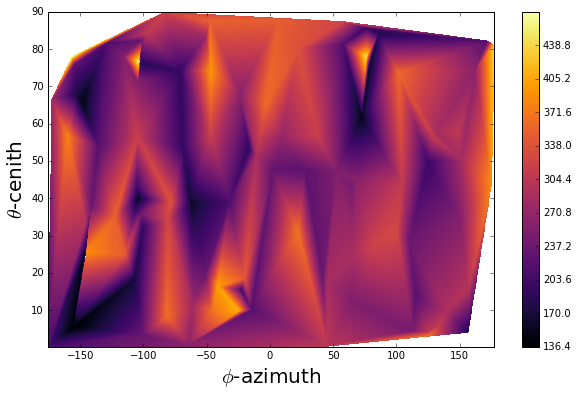

In [11]:
#Define linear spaces
thetai = np.linspace(theta.min(), theta.max(), 1000)
phii = np.linspace(phi.min(), phi.max(), 1000)
# Interpolates from a nonuniformly spaced grid to some other grid using 
Phii = griddata(phi, theta, Phi, phii, thetai, interp='linear')
# Plots and customization 
plt.figure(figsize=(10,6))
CS = plt.contourf(phii, thetai, Phii, 1000, cmap=plt.cm.inferno)
plt.colorbar()
plt.xlabel(r'$\phi$-azimuth', linespacing=1, fontsize = 20)        
plt.ylabel(r'$\theta$-cenith', linespacing=1, fontsize = 20)
plt.show()
#plt.savefig('flujoabcont.png', dpi = 300)

En la gráfica anterior se muestra la densidad de flujo para direcciones de arribo cenith y azimuth de muones al volcán, ahora vamos a convertir estos ángulos de incidencia a los ángulos de incidencia en el detector. En este caso se definen las rotaciones del MuTe en términos de los ángulos de Euler, donde $\omega_1$, $\omega_2$ y $\omega_3$, son las rotaciones respecto a ejes X, Y y Z respectivamente. O sea, $\omega_1$, $\omega_2$ y $\omega_3$, son los ángulos sobre el que rota el eje X, Y y Z sobre si mismo, respectivamente. Vamos a suponer siempre que $\omega_2=0$ puesto que esta rotación no es necesaria nunca.
En este caso, el nuevo $\theta_d$ y $\phi_d$, se definen en términos de $\theta$ y $\phi$ tal que:\\

$\theta_d=\arccos\left(\sin(\theta)\sin(\phi)\sin(\omega_1)+\cos(\theta)\cos(\omega_1)\right)$

$\phi_d=\arccos\left(\frac{\cos(\omega_1)\sin(\omega_3)\sin(\theta)\sin(\phi)+\sin(\omega_1)\sin(\omega_3)\cos(\theta)+\cos(\omega_3)\sin(\theta)\cos(\phi)}{\sqrt{1-\sin(\theta)^2\sin(\phi)^2\sin(\omega_1)^2-2\sin(\theta)\sin(\phi)\sin(\omega_1)\cos(\theta)\cos(\omega_1)-\cos(\theta)^2\cos(\omega_1)^2}}\right)$

**Transformando ángulos...**

In [12]:
omega1=np.pi/2
omega3=0
theta_rad=np.radians(theta)
phi_rad=np.radians(phi)

In [13]:
theta_d=np.arccos((np.sin(theta_rad)*np.sin(phi_rad)*np.sin(omega1)+np.cos(theta_rad)*np.cos(omega1)))
theta_d_grad=np.degrees(theta_d)
print theta_d
print theta_d_grad

[ 1.34600766  1.8345532   0.85886883  2.34740184  0.56141922  1.71202336
  2.65871274  1.69209546  1.54275799  2.50808182  1.49913405  1.27510733
  1.71512666  1.10603887  0.5675066   1.8210372   2.90581405  1.36555306
  0.32132633  1.44665219  2.39826941  1.99292663  1.79550211  1.90752054
  1.88003733  1.62005324  0.34954437  1.88178923  1.44073285  1.09393219
  2.29308045  2.43836158  0.56988965  1.68064956  1.58692439  0.24910332
  2.80705431  1.37228597  2.43653194  1.96560276  0.83636641  2.06714869
  1.94791951  1.12088416  1.78331865  0.12326202  2.15678684  0.87754944
  1.67284353  2.81852526  2.15796304  3.02009521  0.89838905  2.97566579
  1.5268792   1.51121266  2.18249796  1.69251589  1.61108728  2.12079831
  1.22410757  1.5273184   0.88868434  1.03500943  1.46134228  0.94084756
  1.9686427   2.24267039  1.62771169  1.19096652  1.82972887  2.17001789
  1.75799269  0.32545174  1.96790057  1.64304579  1.61572631  0.88483335
  1.49922495  1.29227304  1.51336325  2.23013398  2

In [14]:
phi_d=np.arccos((np.cos(omega1)*np.sin(omega3)*np.sin(theta)*np.sin(phi)
                 +np.sin(omega1)*np.sin(omega3)*np.cos(theta)
                 +np.cos(omega3)*np.sin(theta)*np.cos(phi))
                /(np.sqrt(1-np.sin(theta)**2*np.sin(phi)**2*np.sin(omega1)**2
                          -2*np.sin(theta)*np.sin(phi)*np.sin(omega1)*np.cos(theta)*np.cos(omega1)
                          -np.cos(theta)**2*np.cos(omega1)**2)))
phi_d_grad=np.degrees(phi_d)
print phi_d
print phi_d_grad

[ 1.29251967  0.58214846  1.08436697  0.52793958  1.69105005  2.26487261
  1.82804274  1.15043043  1.18682817  1.47184961  1.22827991  2.53611386
  0.55114834  1.32963269  1.44871975  1.25291111  0.92645472  0.75315449
  1.03613661  1.59611574  1.17483205  1.84766297  1.57035286  0.11480927
  1.86088576  2.10723738  2.65729911  1.69935024  2.03417522  1.18531554
  1.63643369  0.15425996  0.79962192  1.65107246  0.95997549  2.11277573
  2.85142954  1.51926603  1.51263255  1.56251111  1.50585286  2.05876734
  1.14951341  2.07059597  2.04310229  1.8723793   1.3000589   1.30291105
  1.74062522  2.14970463  0.63914431  1.09602329  0.74644842  2.27395706
  1.6259632   1.80183957  2.3695844   1.5792226   1.04364324  0.85863723
  1.35146695  1.48919292  1.64630798  1.73288022  1.61798025  1.22292918
  1.15070757  2.35162551  1.71924608  1.47211274  0.07028103  1.32109032
  0.87469522  1.56064518  1.87962666  2.02146113  1.10300109  0.40846014
  2.88678791  1.40652836  1.69335961  1.95542624  0

Ahora a convertirlos a ángulos $\alpha_d$ y $\beta_d$ cosenos directores en el detector rotado...

In [15]:
alpha_d=np.arccos(np.cos(phi_d)*np.sin(theta_d))
alpha_d_grad=np.degrees(alpha_d)
print alpha_d
print alpha_d_grad

[ 1.29969996  0.63276237  1.20903164  0.90691415  1.63470729  2.2566154
  1.68920744  1.15371255  1.18698697  1.5122842   1.22919495  2.47599236
  0.56783777  1.35564033  1.50529239  1.26314286  1.43001466  0.77528282
  1.40916526  1.59592084  1.30672113  1.82280371  1.57036401  0.35505205
  1.84675521  2.10651635  1.87872684  1.69315178  2.02995932  1.23019166
  1.62002842  0.87759034  1.18527004  1.65058753  0.96006655  1.69831247
  1.89083989  1.52027888  1.53311387  1.56314849  1.52260968  1.99572773
  1.18078916  2.01701474  2.03164203  1.60732459  1.3460867   1.36576781
  1.73973319  1.74537664  0.8390353   1.51536356  0.95903719  1.67780237
  1.62590996  1.80142213  2.19763537  1.57916025  1.04411559  0.97990889
  1.36471058  1.48927021  1.62938955  1.71000671  1.61769768  1.29172648
  1.18533348  2.15422348  1.71900393  1.47916666  0.26809432  1.36528807
  0.88920658  1.56755068  1.85489567  2.02019915  1.10351085  0.78108384
  2.87713748  1.41291306  1.6931565   1.87189552  1.

In [16]:
beta_d=np.arccos(np.sin(phi_d)*np.sin(theta_d))
beta_d_grad=np.degrees(beta_d)
print beta_d
print beta_d_grad

[ 0.35588256  1.01124553  0.83754919  1.20325029  1.01391263  0.70595505
  1.10509168  0.43651243  0.38493983  0.94087341  0.34964338  0.99505666
  1.02602676  0.51951392  1.0080266   0.40191938  1.38293099  0.83714174
  1.295586    0.12668679  0.89646426  0.5002183   0.22470622  1.46246062
  0.4207936   0.53847738  1.41066466  0.33571694  0.48000702  0.60369608
  0.72472464  1.47126957  1.17352943  0.13596336  0.61100656  1.35798979
  1.4767187   0.20500428  0.86717377  0.3948888   0.73676163  0.68139335
  0.55777072  0.659438    0.51460618  1.45312387  0.63879331  0.73513403
  0.19787649  1.30181739  1.05111704  1.46279273  1.01074892  1.44447122
  0.07049923  0.23846967  0.9629686   0.12200944  0.52854563  0.86935424
  0.40785963  0.0924405   0.68561317  0.55746866  0.11915373  0.70801143
  0.57029627  0.98129749  0.15891146  0.39183663  1.50286187  0.64322841
  0.71675354  1.24536198  0.49796582  0.45602671  0.46978892  1.25838462
  1.31665835  0.32226782  0.13529146  0.74858952  1

**Ahora vamos a calcular la aceptancia para las direcciones incidentes..**

In [17]:
Omega, Acep = OmegaCal(alpha_d, beta_d)

In [18]:
print Acep

[  3.84178062e-01   1.01504971e+00   1.10298854e-01   1.34261369e-01
   1.24144582e-01   8.36260871e-01   4.82204463e-01   5.36625823e-01
   1.45981033e-01   5.78369114e-01   2.99945376e-01   1.05416076e+00
   7.52210293e-01   2.38137899e-01   1.63932455e-01   4.71632575e-01
   2.73386961e+00   1.05644114e+00   1.84444494e+00   8.94041815e-02
   3.88806076e-01   1.45987295e-02   3.99628844e-01   3.52232480e-01
   3.19524665e-01   3.14058331e-01   1.58379242e+00   2.29210800e-01
   6.13532091e-01   2.36013254e-01   1.29376186e+00   7.92989071e-01
   2.05744468e-01   2.25974205e-02   1.17749807e-01   2.60823643e+00
   1.80144630e+00   1.84220311e-01   9.70896160e-01   9.50600429e-01
   1.28483999e+00   4.73331013e-01   5.88765917e-01   6.28544406e-01
   7.98762564e-01   4.24225726e+00   4.54244169e-01   6.58840768e-01
   1.60357443e-01   1.81826031e+00   4.88726909e-01   4.18431894e+00
   3.14860438e-01   3.56409873e+00   1.96090982e-02   1.71984840e-01
   5.03771262e-01   1.15222787e-01

In [19]:
aceptancia=Acep

Ahora digamos que queremos determinar diferencias en los flujos en una variación del 5% del flujo para una dirección determinada..

In [20]:
Phi_variation=Phi*1.05

In [21]:
print Phi_variation

[ 299.77437417  245.31212039  273.28420829  412.87132359  337.76766431
  302.42233113  269.1914495   291.65253102  241.1839819   329.93301772
  323.13412818  276.31325775  381.17208971  246.66114656  223.50886744
  403.52239136  244.23195598  245.17457332  464.16659233  366.9938376
  369.48382618  236.98875989  195.0953087   223.00114148  175.87706108
  378.58698037  376.26293201  311.17097119  230.78340687  337.00443536
  208.90700973  290.58844873  158.53446063  359.73684144  276.58859813
  201.94121081  476.48035209  265.82311007  222.20725278  364.83520284
  324.66324683  152.41733745  273.52020931  321.15617564  292.96531456
  185.35189731  339.76210563  322.90802078  206.46584568  189.75218465
  167.49961297  336.47936883  257.13471463  320.5635313   460.4520874
  315.98868656  248.42125211  382.26827599  143.14346162  198.52979732
  234.7664378   382.18417737  206.48235491  343.48018819  306.57713082
  267.09138244  501.44159028  157.02021359  246.31387627  295.87279633
  160.77

Luego la variacion de flujo será $\Delta\Phi=|\Phi-\Phi_{variation}|$.

In [22]:
Delta_Phi=np.abs(Phi-Phi_variation)
Delta_Phi2=(Delta_Phi)**2
print Delta_Phi2

[ 203.77477417  136.45813244  169.35206009  386.53680237  258.70066905
  207.39062667  164.31754305  192.88253708  131.9041114   246.8385401
  236.77021495  173.12702134  329.46068475  137.96308667  113.27939642
  369.22975131  135.25906649  136.30515057  488.55017105  305.40697696
  309.56530116  127.35526602   86.308797    112.76532676   70.14226896
  325.00703334  321.02901134  219.56320479  120.77319929  257.53285591
   98.96176579  191.47765654   56.991327    293.44806143  173.47222815
   92.47222817  514.81525153  160.23112436  111.96386211  301.82477377
  239.01638059   52.67810602  169.64468232  233.88047426  194.62284701
   77.90323319  261.76482636  236.43897933   96.6624613    81.64601265
   63.61932051  256.73098787  149.92803054  233.01808979  480.76218774
  226.41462592  139.93904421  331.35835561   46.46269979   89.37433202
  124.9779599   331.21257467   96.67792038  267.52526005  213.12820214
  161.76373373  570.16704866   55.90781741  137.57488809  198.50501498
   58.6

Calculamos con fórmula de Lesparre el tiempo de exposición del telescopio.. En este caso $DT:=\Delta T=\frac{Phi}{Acep\times \Delta\Phi^2}$.

In [23]:
DT=Phi/(aceptancia*Delta_Phi2)
print DT

[  3.64688630e+00   1.68671991e+00   1.39336133e+01   7.57675943e+00
   1.00162106e+01   1.66070945e+00   3.23561473e+00   2.68356410e+00
   1.19290099e+01   2.20099177e+00   4.33335521e+00   1.44191853e+00
   1.46483573e+00   7.15023025e+00   1.14627703e+01   2.20687563e+00
   6.29026593e-01   1.62154333e+00   4.90579860e-01   1.28006696e+01
   2.92361927e+00   1.21396588e+02   5.38698339e+00   5.34703225e+00
   7.47370072e+00   3.53242783e+00   7.04789775e-01   5.88864182e+00
   2.96624779e+00   5.28052716e+00   1.55396751e+00   1.82265194e+00
   1.28764885e+01   5.16660792e+01   1.28959937e+01   7.97402104e-01
   4.89308740e-01   8.57667680e+00   1.94678628e+00   1.21102901e+00
   1.00685543e+00   5.82170184e+00   2.60805778e+00   2.08064050e+00
   1.79479720e+00   5.34140185e-01   2.72135369e+00   1.97419475e+00
   1.26856274e+01   1.21732474e+00   5.13061269e+00   2.98308803e-01
   5.18764778e+00   3.67608421e-01   4.65165207e+01   7.72836436e+00
   3.35604020e+00   9.53548210e+00

Vamos a escribir un archivo con estos cálculos.. El archivo contendrá ($\theta$, $\phi$, $\Phi$, aceptancia, $\Delta\Phi^2$,$\Delta T$)

In [24]:
g5=np.c_[theta,phi,Phi,aceptancia,Delta_Phi2,DT] #
np.savetxt('directionsandflux_tiempo.dat', g5)

In [25]:
datos2 = np.loadtxt('directionsandflux_tiempo.dat')

In [26]:
print datos2.shape

(100, 6)


In [27]:
theta=datos2[:,0]
phi=datos2[:,1]
A=datos2[:,3]
T=datos2[:,5]

In [28]:
print theta.shape, phi.shape, A.shape, T.shape

(100,) (100,) (100,) (100,)


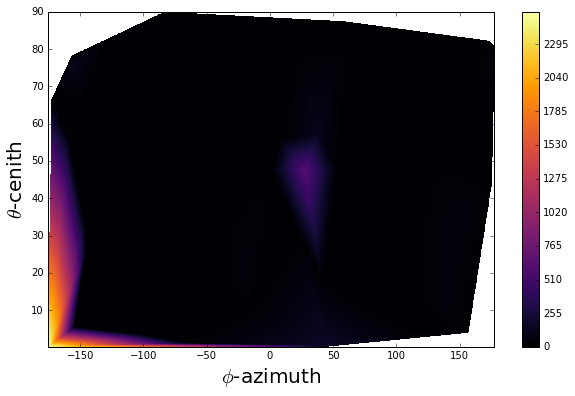

In [29]:
#Define linear spaces
thetai = np.linspace(theta.min(), theta.max(), 1000)
phii = np.linspace(phi.min(), phi.max(), 1000)
# Interpolates from a nonuniformly spaced grid to some other grid using 
Ti = griddata(phi, theta, T, phii, thetai, interp='linear')
# Plots and customization 
plt.figure(figsize=(10,6))
CS = plt.contourf(phii, thetai, Ti, 1000, cmap=plt.cm.inferno)
plt.colorbar()
plt.xlabel(r'$\phi$-azimuth', linespacing=1, fontsize = 20)        
plt.ylabel(r'$\theta$-cenith', linespacing=1, fontsize = 20)
plt.show()
#plt.savefig('flujoabcont.png', dpi = 300)

In [30]:
print np.min(Ti)
print np.max(Ti)

0.299667732586
2535.37021208


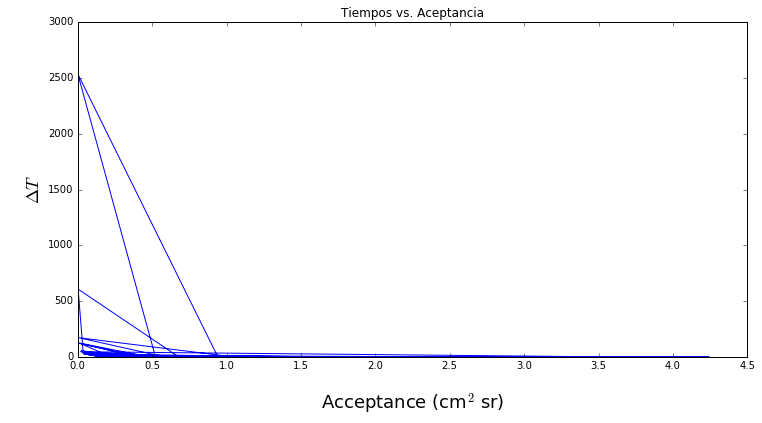

In [31]:
plt.figure(figsize=(12,6))
plt.title('Tiempos vs. Aceptancia')
plt.xlabel('\n' + r'Acceptance (cm$^2$ sr)', linespacing=1, fontsize = 18)
plt.ylabel('\n' + r'$\Delta T$', linespacing=1, fontsize = 18)
plt.plot(A, T)
#plt.savefig('TAab.png', dpi=300)